In [1]:
import pandas as pd

# Load the dataset
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

# Convert to DataFrame
df = pd.DataFrame(california.data, columns=california.feature_names)
df["Target"] = california.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
# Step 1: Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd

# Step 2: Load the dataset
dataset = df

# Step 3: Preprocess the data
# This step depends on your dataset. Here's a simple example of filling missing values with mean
dataset.fillna(dataset.mean(), inplace=True)

# Step 4: Split the dataset into training and testing sets
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Step 5: Choose a machine learning model
model = LinearRegression()

# Step 6: Train the model using the training set
model.fit(X_train, y_train)

# Step 7: Evaluate the model using the testing set
y_pred = model.predict(X_test)
print("Predictions:", y_pred)
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))

# Step 8: Make predictions
# print(model.predict([[your, input, here]]))

Predictions: [2.28110738 2.79009128 1.90332794 ... 0.8418697  2.7984953  2.21779325]
Mean Absolute Error: 0.5351261336554748


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import mlflow
import mlflow.sklearn

# Start an MLflow experiment
with mlflow.start_run():
    # Step 2: Load the dataset
    dataset = df

    # Step 3: Preprocess the data
    # This step depends on your dataset. Here's a simple example of filling missing values with mean
    dataset.fillna(dataset.mean(), inplace=True)

    # Step 4: Split the dataset into training and testing sets
    X = dataset.iloc[:, :-1].values
    y = dataset.iloc[:, -1].values
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=0
    )

    # Step 5: Choose a machine learning model
    model = LinearRegression()

    # Step 6: Train the model using the training set
    model.fit(X_train, y_train)

    # Step 7: Evaluate the model using the testing set
    y_pred = model.predict(X_test)

    # Log parameters (features used)
    mlflow.log_param("features", dataset.columns.tolist())

    # Log metric (MAE)
    mlflow.log_metric("mae", metrics.mean_absolute_error(y_test, y_pred))

    # Log model
    mlflow.sklearn.log_model(model, "model")

# The run ends automatically at the end of the with block

   Actual  Predicted
0   1.369   2.281107
1   2.413   2.790091
2   2.007   1.903328
3   0.725   1.017603
4   4.600   2.948524


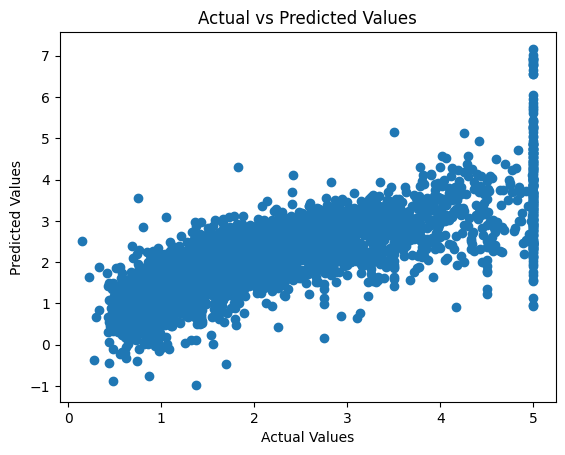

In [3]:
import matplotlib.pyplot as plt

# Create a DataFrame for comparison
comparison = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

# Display the first few rows of the comparison DataFrame
print(comparison.head())

# Visualize the differences
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()